<a href="https://colab.research.google.com/github/polock11/zomato_data_analysis/blob/main/eda_zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis on the Zomato dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('zomato.csv', encoding = 'latin-1')
pd.options.display.max_columns = df.shape[1]
df.sample(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
6730,9408,Gurdasman Punjabi Khana & Caterers,1,New Delhi,"D-1/17, Rohini, New Delhi",Rohini,"Rohini, New Delhi",77.132292,28.734460,North Indian,250,Indian Rupees(Rs.),No,No,No,No,1,3.3,Orange,Average,64
6285,18265418,Yellowtail,1,New Delhi,"WZ-884, Near Punjab & Sind Bank, Rani Bagh, Pi...",Pitampura,"Pitampura, New Delhi",77.130408,28.683868,"North Indian, Chinese, Fast Food",600,Indian Rupees(Rs.),No,Yes,No,No,2,3.1,Orange,Average,19


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.shape

(9551, 21)

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


#**What to do:**
* Look for missing values
* Explore the numeric variables
* Explore the categorical variables
* Find relation between features

In [7]:
#Check missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
#chacking missing values 'alternative'
[columns for columns in df.columns if df[columns].isnull().sum() > 0]

['Cuisines']

#**Merging the country code with the dataset**

In [9]:
#getting the 'Country-Code.xlsx' excel file
df_country = pd.read_excel('Country-Code.xlsx')
'''
    'on' --> on which feature you want to combine
    'how' --> where you wnat to merge, left, right or inner join
'''
#mearging the codes with the dataframe
final_df = pd.merge(df, df_country, on = 'Country Code', how = 'left')

#increasing the columns in the output 
pd.options.display.max_columns = final_df.shape[1]

final_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


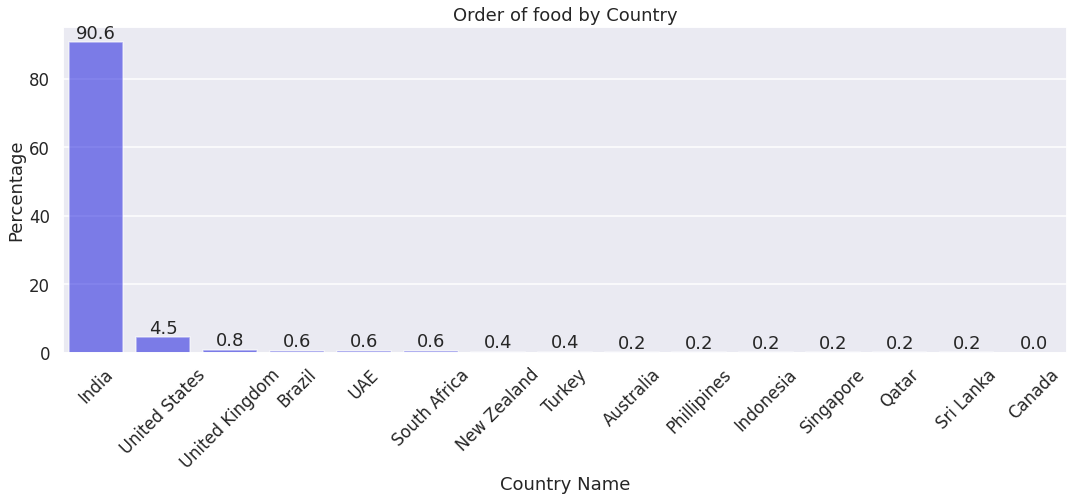

In [10]:
#counting requests from each country and setting a dataframe
country_pct = pd.DataFrame(final_df['Country'].value_counts()).reset_index().rename(columns = {'index': 'Country',
                                                                                               'Country':'Count'})
#couting the 'Percentage'                                                                                                
country_pct['Percentage'] = np.round((country_pct['Count']/country_pct['Count'].sum()) * 100, 2)
country_pct.head()

#getting the canvas
plt.figure(figsize = (18,6))
sns.set_context('talk')
sns.set_style('darkgrid')

splot = sns.barplot(x = 'Country', y = 'Percentage', data = country_pct, color = 'blue', alpha = .55)
plt.xlabel("Country Name")
plt.title('Order of food by Country')
plt.xticks(rotation = 45)

#for annotation on each bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

<h3><b>Observations:</b></h3>

* As the App is mainly based on India, it gest most of the customer from there (90.6%)
* US holds 4.5% 
* From UK 0.8% orders are made

In [11]:
# listing the currencies of each country
cur = pd.DataFrame(final_df.groupby(['Country', 'Currency']).size().reset_index())
cur = cur.drop(columns = [0], axis = 1)
cur

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


<h3><b>Observations:</b></h3>

* All mentioned prices are the national currencey of each country. 

In [12]:
def barplot_(country_name, currency_):

    '''
        * this function will plot two barplots:
            1. avg cost for two person based on one particular country's city
            2. max and min avg cost for two person base on one particular country's city
        
        * args:
            'country_name' --> name of the country
            'currency_' --> currencey of the country
    '''
    
    #getting df based on one particular country
    df_country = final_df[final_df['Country'] == country_name]

    #grouping data by city, and calculating mean, max, min, count 
    data = df_country.groupby('City')[['Average Cost for two']].agg(['mean', 'count', 'max', 'min']).reset_index().sort_values(by = ('Average Cost for two', 'mean'), ascending = False)

    plt.figure(figsize = (16,14))
    sns.set_context('talk')
    sns.set_style('darkgrid')
    
    #plot for Average Cost For Two Person in Country
    plt.subplot(2,1,1)
    sns.barplot(x = 'City', y = ('Average Cost for two','mean'), data = data);
    plt.xticks(rotation = 90)
    plt.xlabel('')
    plt.ylabel('Price')
    plt.title('Average Cost For Two Person in ' + country_name + " in "+ currency_)

    #plot for Minimum & Maximum Average Average Cost For Two Person in Country
    plt.subplot(2,1,2)
    sns.barplot(x = 'City', y = ('Average Cost for two','max'), data = data);
    sns.barplot(x = 'City', y = ('Average Cost for two','min'), data = data);
    plt.xticks(rotation = 90)
    plt.ylabel('Price')
    plt.title('Minimum & Maximum Cost For Two Person in ' + country_name + " in "+ currency_)


    plt.tight_layout()
    plt.show()

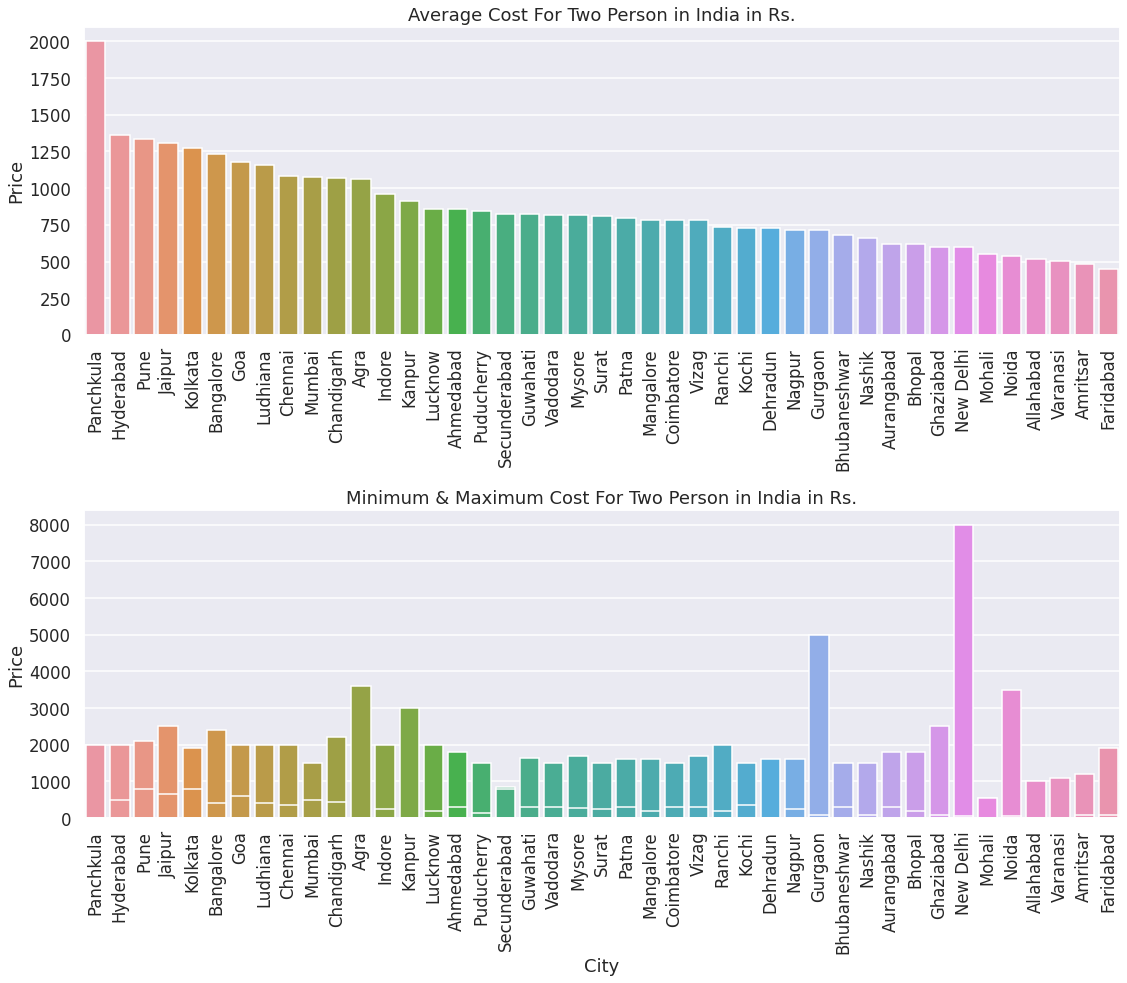

In [13]:
barplot_('India', 'Rs.')

<h3><b>Observations:</b></h3>

* Highest average price for two people price is in **Panchkula** (Rs.2000) and lowest is in **Faridabad** (Rs. 450)
* Maximum cost for two people is in **New Delhi** (Rs.8000) and minimum cost is in **Noida** (Rs.100 approx.)


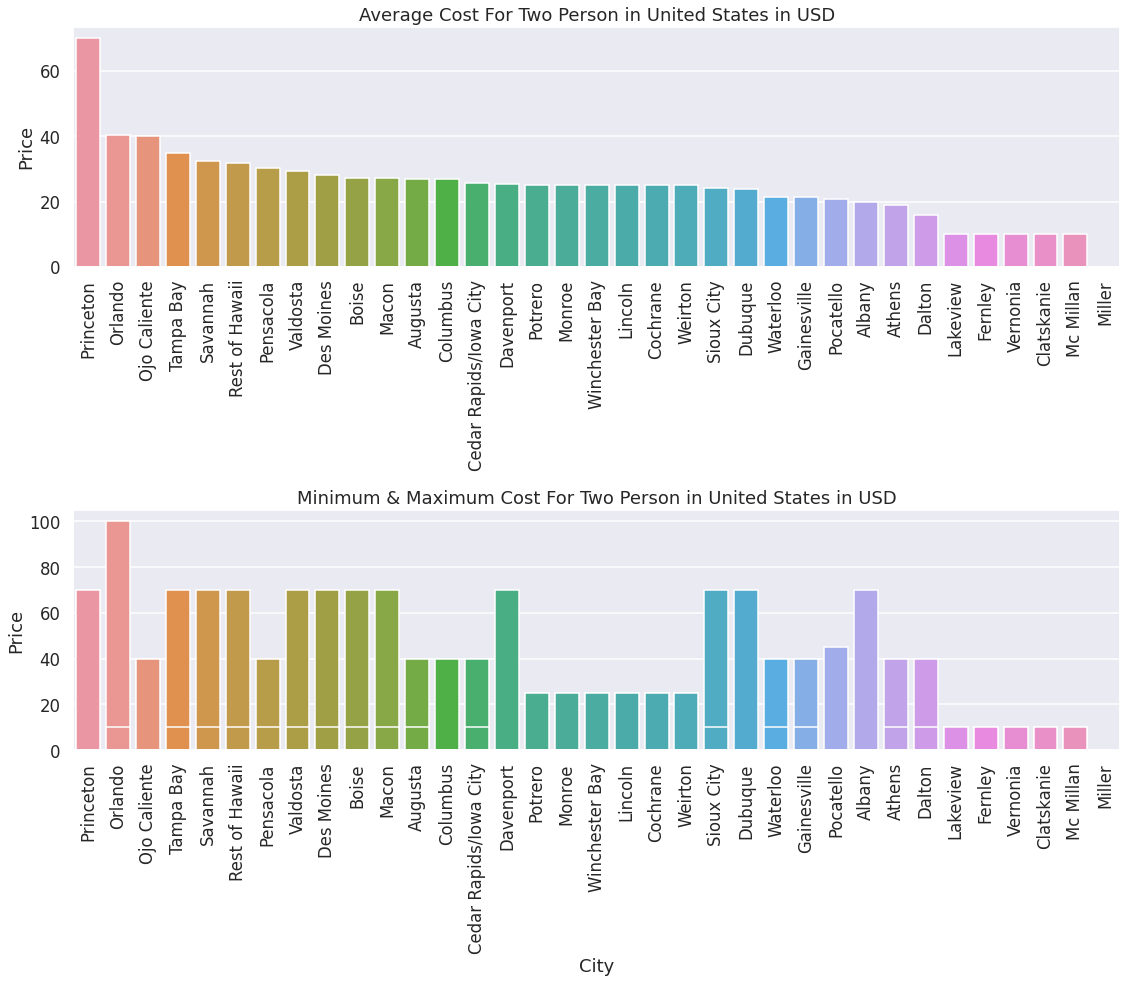

In [14]:
barplot_('United States','USD')

<h3><b>Observations:</b></h3>

* Highest average price for two people is in **Princeton** ($70) and lowest are in few cities such as **Lakeview, Fernley, Vernonia** (\$10)
* Maximum cost for two people in **Orlando** (\$100) and minimum cost is \$10 which is available in most of the cities


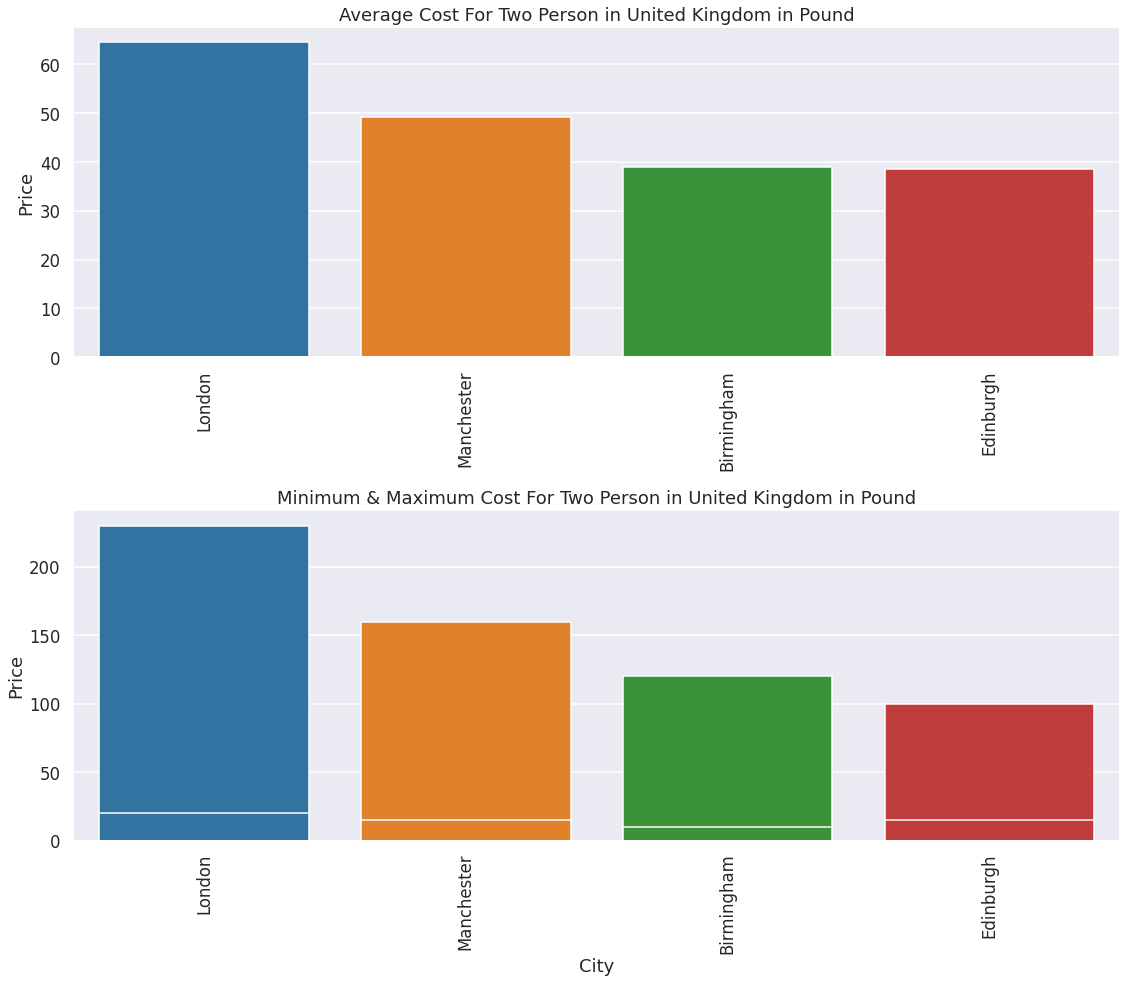

In [15]:
barplot_('United Kingdom', 'Pound')

<h3><b>Observations:</b></h3>

* Highest average price for two people is in **London** (200£) and lowest are in few cities such as **Birmingham & Edingurgh** (39£)
* Maximum cost for two people in **London** (280£) and minimum cost is in **Birmingham** (4£)

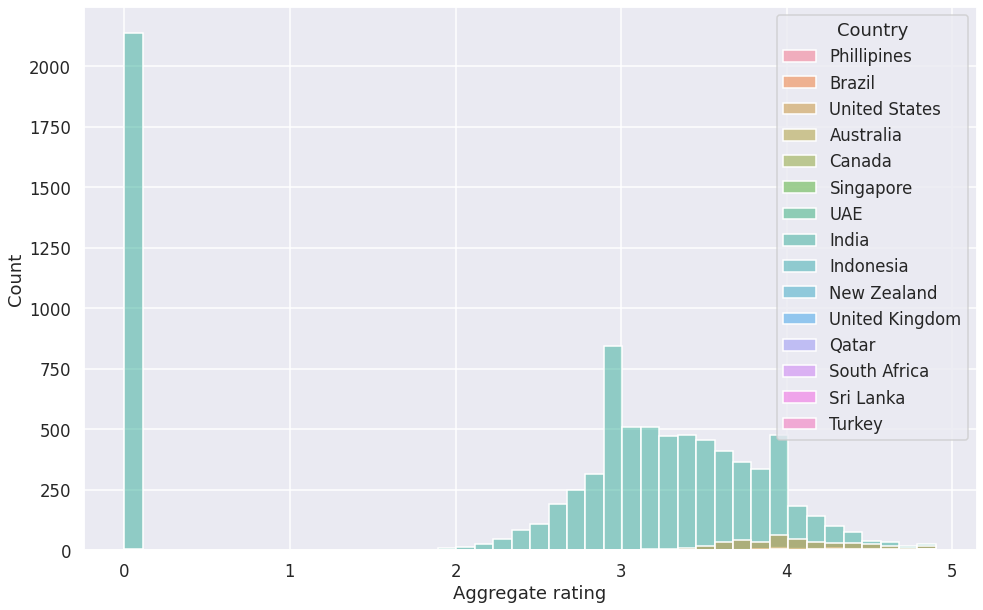

In [16]:
plt.figure(figsize = (16,10))
sns.set_style('darkgrid')
sns.set_context('talk')

#ploting aggregate rating count from each country
sns.histplot(x = 'Aggregate rating', data = final_df, hue = 'Country');

<h3><b>Observations:</b></h3>

* Almost 2300 resturants are not rated in **India**


In [17]:
def scatter_country(country):
    
    '''
        * this function will plot two scatter plots:
            1. avg cost for two person vs. aggregate rating and rating text as hue
            2. regrassion plot with a trend/regression line
        
        * args:
            'country' --> name of the country           
    '''

    plt.figure(figsize = (20,5))
    sns.set_context('talk')

    # plot 1
    plt.subplot(1,2,1)
    rating_country = final_df[final_df['Country'] == country]
    sns.scatterplot(y = 'Average Cost for two', x = 'Aggregate rating', data = rating_country, hue = 'Rating text')
    plt.ylabel('Average Cost For Two Person')

    #plot 2
    plt.subplot(1,2,2)
    sns.regplot(y = 'Average Cost for two', x = 'Aggregate rating', data = rating_country, line_kws = {'color':'red'}, scatter_kws = {'edgecolor':'white'})
    plt.ylabel('')

    plt.suptitle('Relation between rating and price in '+ country)
    #plt.tight_layout()
    plt.show()

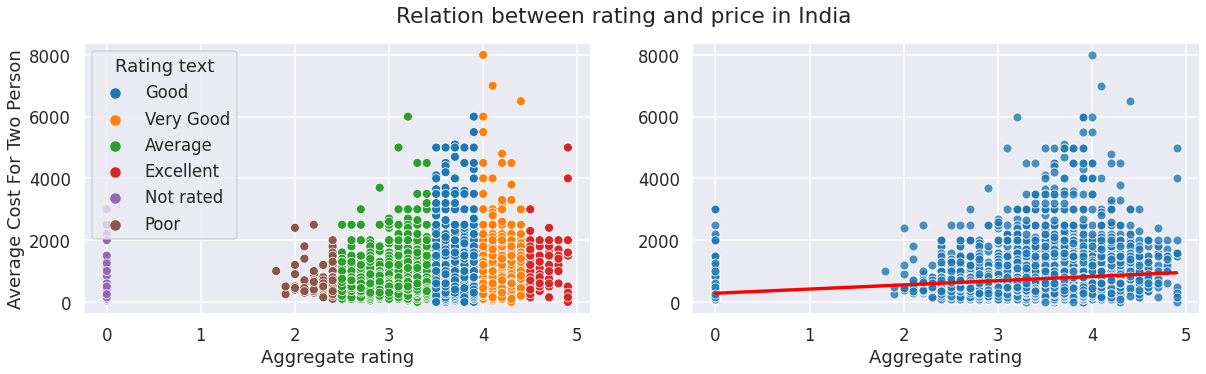

In [18]:
scatter_country('India')

<h3><b>Observations:</b></h3>

* As the rating getting close to 4 the price of the food is increasing and from rating 4 to 5 which falls under the bracket 'Very Good' and 'Excellent' are decreasing. The most delicious foods are not the high priced one's.
* Most of the foods are rated as'Average'
* For an overall 'As the rating increases, the price slighty goes up'   

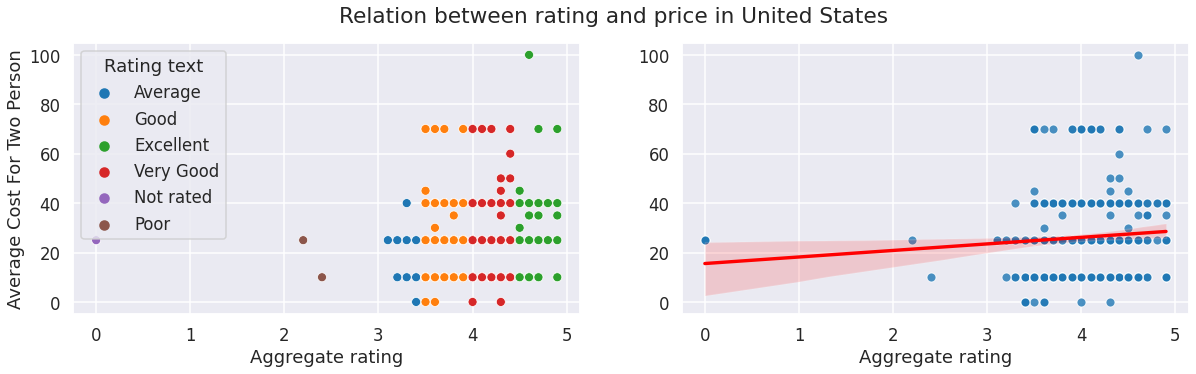

In [19]:
scatter_country('United States')

<h3><b>Observations:</b></h3>

* Most of the food rated form 3.3 to 5 which indicates they varies between Good, Very Good and Excellent
* the price range of 3.3 - 5 rating are nearly same.
* Price slowly goes as the rating goes up

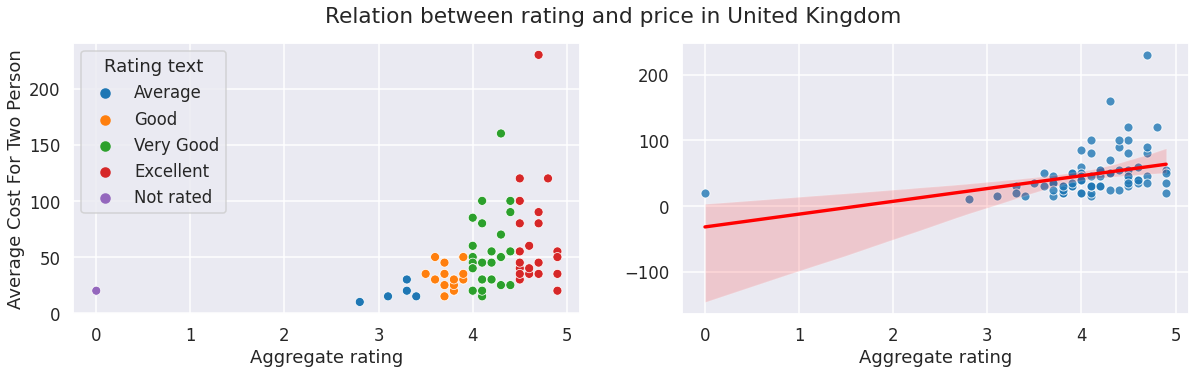

In [20]:
scatter_country('United Kingdom')

<h3><b>Observations:</b></h3>

* Most of the food rated form 4 to 5 which indicates they varies between Very Good and Excellent
* the price range of 4 - 5 rating are nearly same.
* Price slowly goes as the rating goes up

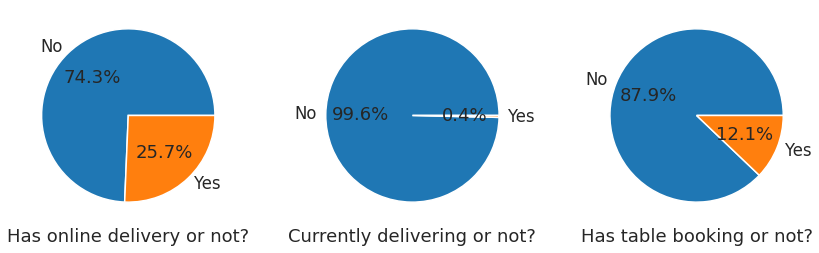

In [21]:
plt.figure(figsize=(12,6))
sns.set_context('talk')

#plotting percentage of online delivery service
plt.subplot(1,3,1)
final_df['Has Online delivery'].value_counts().plot(kind= 'pie', autopct = '%1.1f%%')
plt.xlabel('Has online delivery or not?')
plt.ylabel('')

#plotting percentage of current delivery service
plt.subplot(1,3,2)
final_df['Is delivering now'].value_counts().plot(kind= 'pie', autopct = '%1.1f%%')
plt.xlabel('Currently delivering or not?')
plt.ylabel('')

#plotting percentage of pre-booking of table service
plt.subplot(1,3,3)
final_df['Has Table booking'].value_counts().plot(kind= 'pie', autopct = '%1.1f%%')
plt.xlabel('Has table booking or not?')
plt.ylabel('')

plt.tight_layout()
plt.show()

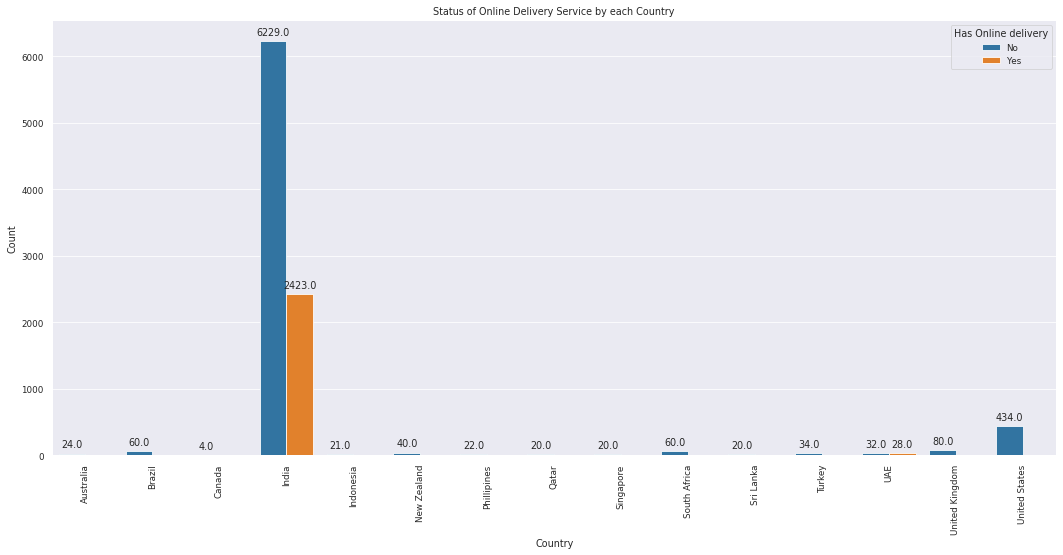

In [24]:
#grouping by country and online serviec for each country
online_delivey = pd.DataFrame(final_df.groupby(['Country','Has Online delivery']).size().reset_index()).rename(columns = {0 : 'Count'})


sns.set_context('paper')
plt.figure(figsize = (18,8))

splot = sns.barplot(x = 'Country', y = 'Count', data = online_delivey, hue = 'Has Online delivery')
plt.xticks(rotation = 90)
plt.title('Status of Online Delivery Service by each Country')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

<h3><b>Observations:</b></h3>

* Most of the restaurant don't have onlive delivery 
* In **India** 2423 restaurants and in **UAE** 26 restaurants have online delivery 

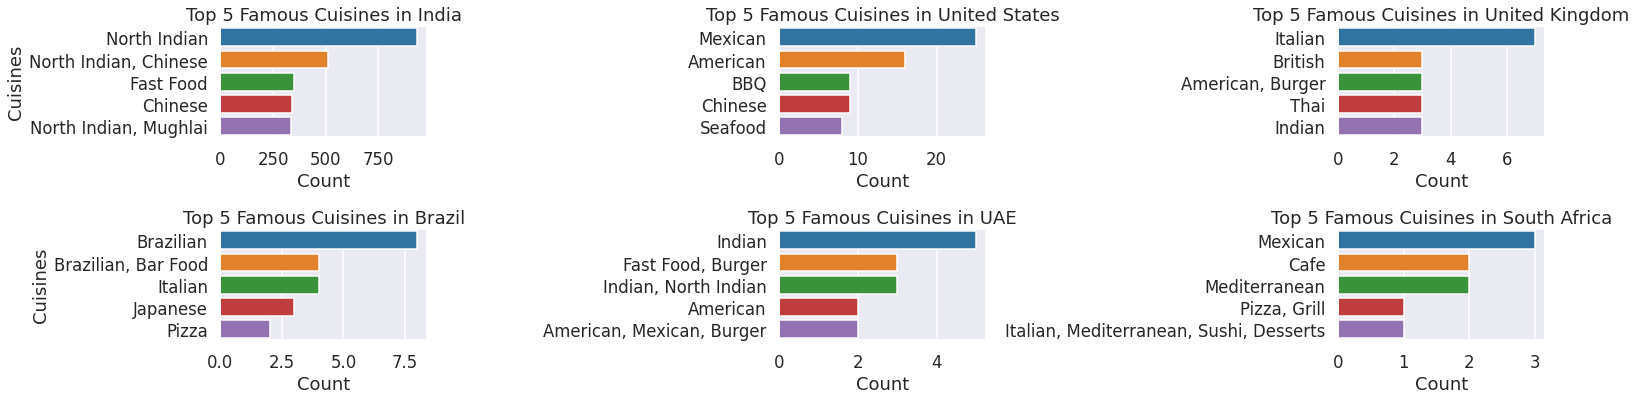

In [23]:
#plotting top 5 cuisines of top 6 countries 
plt.figure(figsize = (22,8))
sns.set_context('talk')

list_ = country_pct['Country'][:6]

for i in range(len(list_)) :
    
    cuisines_ = final_df[final_df['Country'] == list_[i] ]

    cuisines_ = pd.DataFrame(cuisines_['Cuisines'].value_counts()[:5]).reset_index().rename(columns = {'index':'Cuisines',
                                                                                                       'Cuisines':'Count'})
    plt.subplot(3,3, i+1)
    sns.barplot(y = 'Cuisines', x = 'Count', data = cuisines_)
    if i == 1 :
        plt.ylabel('')
    elif i == 2:
        plt.ylabel('')
    elif i == 4:
        plt.ylabel('')
    elif i == 5:
        plt.ylabel('')        
    plt.title('Top 5 Famous Cuisines in '+ list_[i])
    

plt.tight_layout()
plt.show()

<h3><b>Observations:</b></h3>

* All countries have very different choices for cuisines. 
